In [374]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df=pd.read_csv("car.csv")
df

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,8122,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8123,8123,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8124,8124,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8125,8125,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [375]:
# Cleaning
df.isna().sum()
df=df.dropna()
df=df.reset_index(drop=True)
df

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8122,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
7902,8123,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
7903,8124,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
7904,8125,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


Feature Engineering

In [377]:
# Seats
df['seats'].value_counts()

seats
5.0     6254
7.0     1120
8.0      235
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: count, dtype: int64

In [378]:
# Torque
df['torque']
# here we cannot simplify our column that why we have to drop it
df=df.drop(columns=['torque'])


In [379]:
# Max Power
# First we have to remove bhp character from data so that it is convertable into float.

def fxn(x):
    return x.split()[0]
df['max_power']=df['max_power'].apply(fxn)
df


# converting into float
# df['max_power']=df['max_power'].astype(''float32) #error

# Find out illegal value that is not convertable into float
index=[]
for i in range(len(df)):
    try:
        float(df.iloc[i,-2])
    except:
        index.append(i)
print(index)

# Drop the illegal value index
df=df.drop(index=index)
df=df.reset_index(drop=True)

# Again convert column into float 
df['max_power']=df['max_power'].astype('float32')

[840]


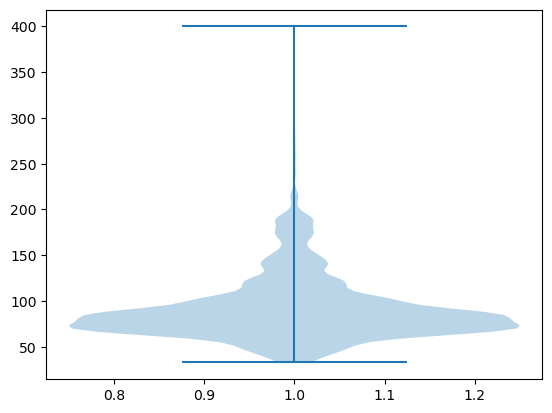

In [380]:
plt.violinplot(df['max_power'])
plt.show()

In [381]:
# Engine
def fxn(x):
    return x.split()[0]
df['engine']=df['engine'].apply(fxn)
df


# converting into float
# df['max_power']=df['max_power'].astype(''float32) #error

# Find out illegal value that is not convertable into float
index=[]
for i in range(len(df)):
    try:
        float(df.iloc[i,-3])
    except:
        index.append(i)
print(index)

# Drop the illegal value index
df=df.drop(index=index)
df=df.reset_index(drop=True)

# Again convert column into float 
df['engine']=df['engine'].astype('float32')
df

[968]


,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248.0,74.000000,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498.0,103.519997,5.0
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497.0,78.000000,5.0
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396.0,90.000000,5.0
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298.0,88.199997,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7899,8122,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197.0,82.849998,5.0
7900,8123,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493.0,110.000000,5.0
7901,8124,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248.0,73.900002,5.0
7902,8125,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396.0,70.000000,5.0


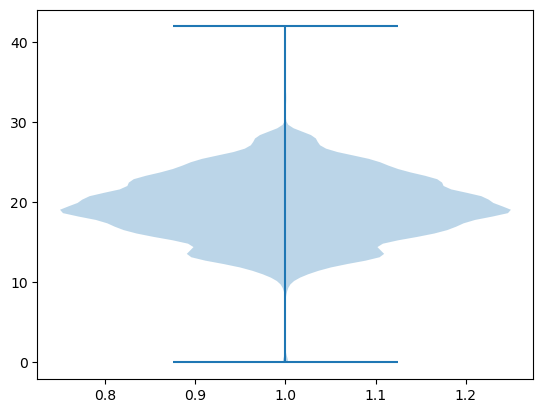

In [382]:
# Mileage
def fxn(x):
    return x.split()[0]
df['mileage']=df['mileage'].apply(fxn)
df['mileage']=df['mileage'].astype('float32')
plt.violinplot(df['mileage'])
plt.show()

In [383]:
# Owner
df['owner'].value_counts()
df['owner']=df['owner'].replace({'Fifth':'Fourth & Above Owner'})
df['owner'].value_counts()
f=df['owner']=='Test Drive Car'
df=df.drop(index=df[f].index)
df=df.reset_index(drop=True)
df['owner'].value_counts

<bound method IndexOpsMixin.value_counts of 0                First Owner
1               Second Owner
2                Third Owner
3                First Owner
4                First Owner
                ...         
7894             First Owner
7895    Fourth & Above Owner
7896             First Owner
7897             First Owner
7898             First Owner
Name: owner, Length: 7899, dtype: object>

[]

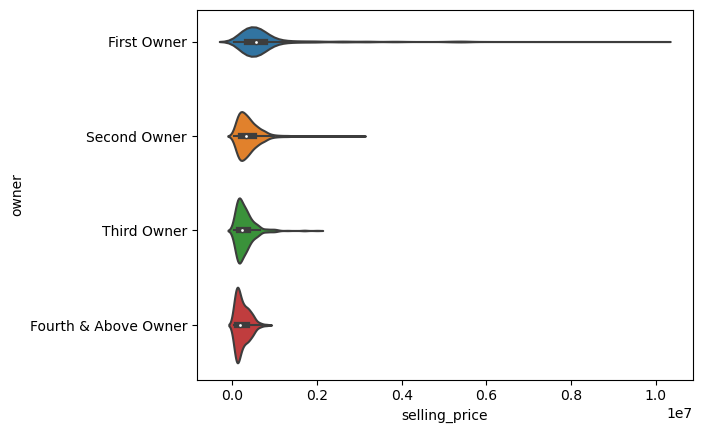

In [384]:
# Making plots of each category 
import seaborn
seaborn.violinplot(data=df,x='selling_price',y='owner')
plt.plot()
# Here seaborn violinplot is making violinplot for each category is

In [385]:
# transmission
df['transmission'].value_counts()

transmission
Manual       6862
Automatic    1037
Name: count, dtype: int64

[]

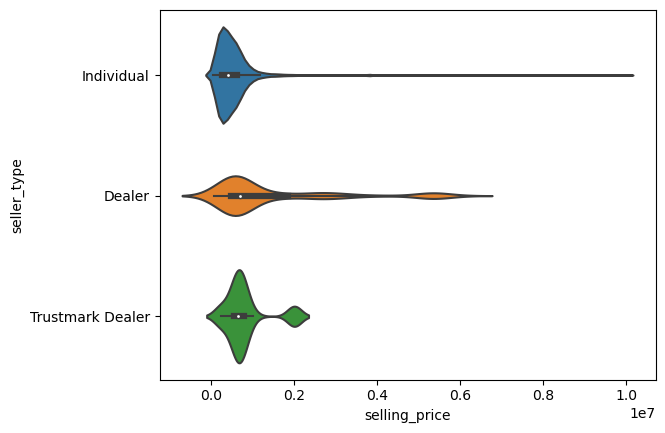

In [386]:
# Seeller type
df['seller_type'].value_counts()
import seaborn
seaborn.violinplot(data=df,x='selling_price',y='seller_type')
plt.plot()
# in graph we can see the distribution of three categories is different from each other 
# Non ordinal Column

fuel
Diesel    4298
Petrol    3514
Eco         87
Name: count, dtype: int64

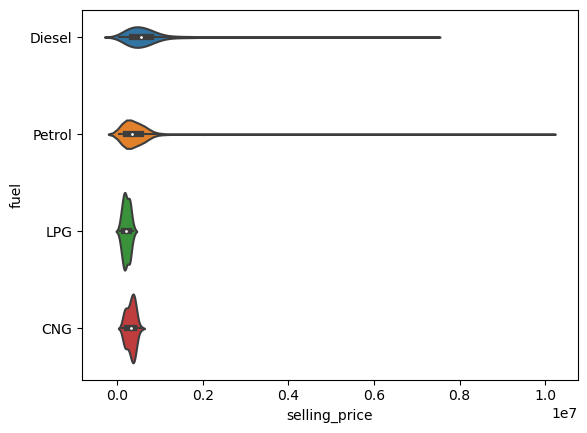

In [387]:
# Fuel
df['fuel'].value_counts()
import seaborn
seaborn.violinplot(data=df,x='selling_price',y='fuel')
plt.plot()
# By visualization we see that there is no impact of car as LPG or CNG
#  so merge both categories into one
df['fuel']=df['fuel'].replace({'LPG':'Eco','CNG':'Eco'})
df['fuel'].value_counts()

In [388]:
#  km driven


In [389]:
df['name'].value_counts()
# Categories count is very high so that directly apply one hot encoding
# Approach -> Merge the categories
df['name']=df['name'].apply(lambda x:x.split()[0])
print(df['name'].value_counts()) #31 categories

# Find average selling price of each brand
groups=df.groupby('name')
prices=groups['selling_price'].mean()
prices=prices.sort_values(ascending=False)

# Converting brands into 3 or 4 categories based on their average selling price
def fxn(x):
    if x in prices.index[0:10]:
        return 2
    elif x in prices.index[10:25]:
        return 1
    else:
        return 0
df['name']=df['name'].apply(fxn)
df

name
Maruti           2366
Hyundai          1359
Mahindra          758
Tata              719
Honda             465
Toyota            452
Ford              388
Chevrolet         230
Renault           228
Volkswagen        184
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               41
Audi               37
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Name: count, dtype: int64


,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,1,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248.0,74.000000,5.0
1,1,1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498.0,103.519997,5.0
2,2,1,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.700001,1497.0,78.000000,5.0
3,3,1,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396.0,90.000000,5.0
4,4,1,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298.0,88.199997,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7894,8122,1,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.500000,1197.0,82.849998,5.0
7895,8123,1,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.799999,1493.0,110.000000,5.0
7896,8124,1,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.299999,1248.0,73.900002,5.0
7897,8125,1,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.570000,1396.0,70.000000,5.0


In [390]:
# Statistical Analysis

In [422]:
numeric=df[['max_power','engine','mileage','km_driven','selling_price','year','seats']]
category=df[['name','fuel','seller_type','transmission','owner']]

# Note-> Before statistical analysis of categories they should be in numeric form
category['fuel']=category['fuel'].replace({'Petrol':0,'Diesel':1,'Eco':2})
category['seller_type']=category['seller_type'].replace({'Individual':0,'Dealer':1,'Trustmark Dealer':2})
category['transmission']=category['transmission'].replace({'Manual':0,'Automatic':1})
category['owner']=category['owner'].replace({'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3})
category

C:\Users\dell\AppData\Local\Temp\ipykernel_8256\2160041661.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category['fuel']=category['fuel'].replace({'Petrol':0,'Diesel':1,'Eco':2})
C:\Users\dell\AppData\Local\Temp\ipykernel_8256\2160041661.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category['seller_type']=category['seller_type'].replace({'Individual':0,'Dealer':1,'Trustmark Dealer':2})
C:\Users\dell\AppData\Local\Temp\ipykernel_8256\2160041661.py:7: SettingWithCopyWarning: 
A value is trying t

,name,fuel,seller_type,transmission,owner
0,1,1,0,0,0
1,1,1,0,0,1
2,1,0,0,0,2
3,1,1,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
7894,1,0,0,0,0
7895,1,1,0,0,3
7896,1,1,0,0,0
7897,1,1,0,0,0


In [424]:
numeric

,max_power,engine,mileage,km_driven,selling_price,year,seats
0,74.000000,1248.0,23.400000,145500,450000,2014,5.0
1,103.519997,1498.0,21.139999,120000,370000,2014,5.0
2,78.000000,1497.0,17.700001,140000,158000,2006,5.0
3,90.000000,1396.0,23.000000,127000,225000,2010,5.0
4,88.199997,1298.0,16.100000,120000,130000,2007,5.0
...,...,...,...,...,...,...,...
7894,82.849998,1197.0,18.500000,110000,320000,2013,5.0
7895,110.000000,1493.0,16.799999,119000,135000,2007,5.0
7896,73.900002,1248.0,19.299999,120000,382000,2009,5.0
7897,70.000000,1396.0,23.570000,25000,290000,2013,5.0


In [392]:
# Feature Selection
#  It is a concept of selecting important features who have direct are indirect relation with dependent
# 4 cases
# 1. Numeric Independent        Numeric Dependent
# 2. Numeric Independent        Category Dependent
# 3. Category Independent       Numeric DEpendent
# 4. Category Independent       Category Dependent

In [393]:
# Distrubution is a way of seeing the probability of samples in the column
# Example:
# There are some common distribution pattern who have their name

# Example-> Dice problem
# Dice-> 1 2 3 4 5 6 
# Lets throw dice what is the probabilty of coming 1? 1/6
# 2-1/6
# 3-1/6
# 4-1/6
# 5-1/6
# 6-1/6


# Example2: Throw 2 dice
# Find probability of total sum of values
# Total cases:36
# 1: sum:2->1 case(1,1)
# 2" sum:3->(1,2)(2,1)->  case2->prob:2/36
# 3: sum:4(1,3),(3,1),(2,2)->cases3 : 3/36u5


# Sum:12
# Above distribution is called as normal dstribution
# It is the world's most important distribution
# Most of the ML algorithm are developd by supposing data as normally distribution 
# why important
#1 Many real time datasets belong to normal distribution
# 2. Mean=mode=median
# 3. If our data is normally distributed we can easily fibd outliers from it
# and also it become easy to predict something from that

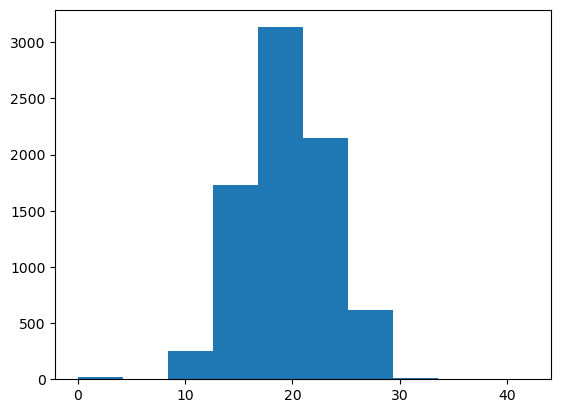

0.5715528

In [394]:
df['mileage']
plt.hist(df['mileage'])
plt.show()

# Measure of central tendency
# Mean
# Standard Deviation: Measure of how far our data is from mean
df['mileage'].std()
# Variance-> It is the square of standard deviation

# skewness-> It is measure of how our distribution curve deviates from
# prefect curve or center
# Note->If skewness is between -1 to +1 then our data is prefectly normal 
# Otherwise it contains outliers
df['mileage'].skew()
# Kurtasis
# It is the measure of how much our curve is flat or sharp
df['mileage'].kurt()

In [395]:
# Pearson Correlation method
# it tells how much dependent column varies if we vary our inpendent column
# If value of correlation is -1 that means if we increase 1 column by 10 % then
# second column will decrease by 10%
# Example-> birth year vs age-> Both have full negative corelation

# If value of correlation is +1 that means if we increase 1 column by 10 % then
# second column will increase by 10%
# Example-> age vs salary
# If correlation is very near to zero that means there is no impact of independent on dependent

# Correlation matrix
# It tells the relation of each numeric column wrt to dependent variable
corr=numeric.corr()
print(corr)



               max_power    engine   mileage  km_driven  selling_price  \
max_power       1.000000  0.704240 -0.374148  -0.036686       0.750335   
engine          0.704240  1.000000 -0.576354   0.207376       0.457972   
mileage        -0.374148 -0.576354  1.000000  -0.173624      -0.124687   
km_driven      -0.036686  0.207376 -0.173624   1.000000      -0.221519   
selling_price   0.750335  0.457972 -0.124687  -0.221519       1.000000   
year            0.225322  0.017638  0.329372  -0.428540       0.412465   
seats           0.192773  0.611352 -0.452019   0.227731       0.043225   

                   year     seats  
max_power      0.225322  0.192773  
engine         0.017638  0.611352  
mileage        0.329372 -0.452019  
km_driven     -0.428540  0.227731  
selling_price  0.412465  0.043225  
year           1.000000 -0.007642  
seats         -0.007642  1.000000  


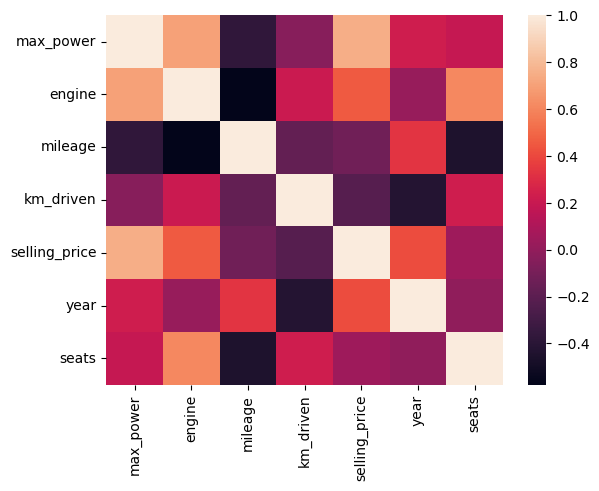

In [396]:
seaborn.heatmap(data=corr)
# Tells relation between column in the form of colr
plt.show()

In [397]:
# Anova-> Analysis of variance 
# it is used to find the fscore so that we check the relation between the categorical and 
# and numerical column
# Hypothesis
# null hyp-> variance of all the categories is same
# alternative hyp-> variance of all the categories is not same
# on the basis of fscore we will decide whether to accept or reject the null hypothesis


In [398]:
from sklearn.feature_selection import f_classif,SelectKBest
# f_classif-> it perform the anova test
# SelectKBest-> it is used to select the top column which arr import wrt to the dependent column
select=SelectKBest(f_classif,k=3)
columns=select.fit_transform(category,numeric['selling_price'])
print(select.scores_)
# f distributional Table-> If the value of fscore is greater than the critical value then we will register the null hypothesis.
# otherwise we accept it.

[12.62495221  3.11258891  6.7549591  12.03276301  3.72507073]


In [399]:
# Outlier detection
# outlier -> data points which are out falling out of the general pattern
# In km_driven we detect an outlier
# we have to remove outlier-> to remove the r2 score

# TO detect outliers
# case1-> when our data is normally distributed
# case2-> When our data belongs to pure random(unknown distribution)

 # when our data is normally distributed---> method is use for outlier detection
# Z score
# mean=10,std=2
# -2 10 +2
# 8 and 12-> belong to first std deviation
# 6 and 14-> belong to second std deviation
# 4 and 16-> belong to third std deviation
# if any data points is falling out of this range will be considered as an outlier

# according to gaussian 
# if the data is normally distributed , then 68% of data that will belong to first standard deviation
# 95% data that will belong to second std dev
# 99.7% data belongs to third std dev

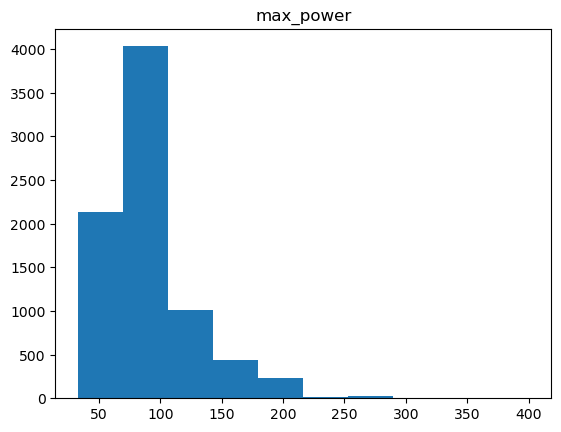

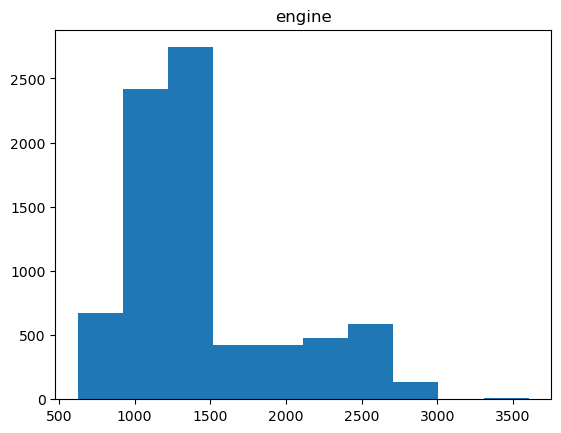

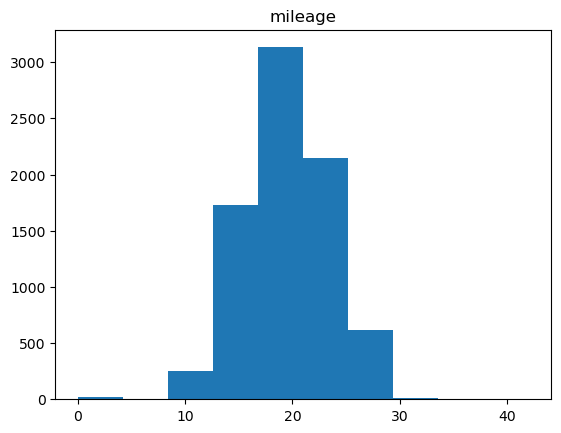

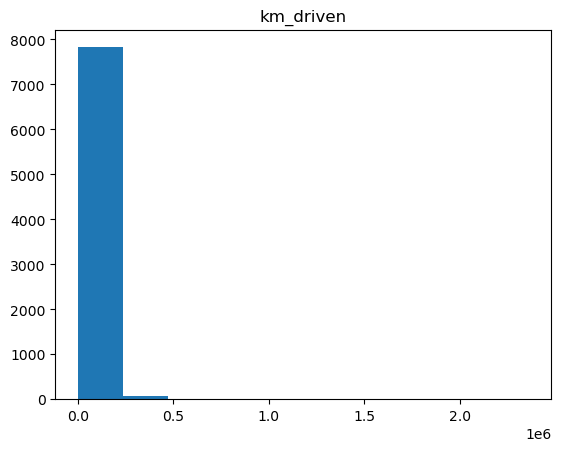

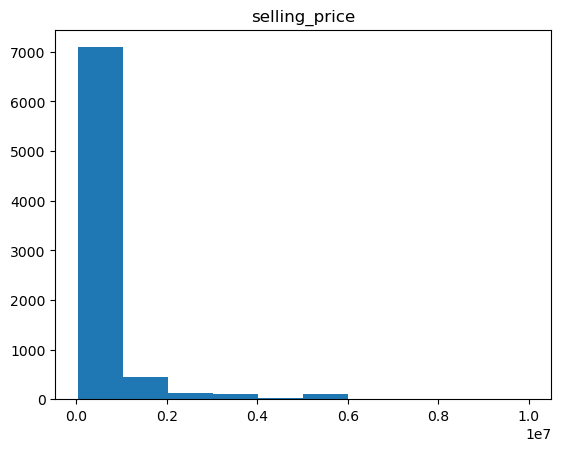

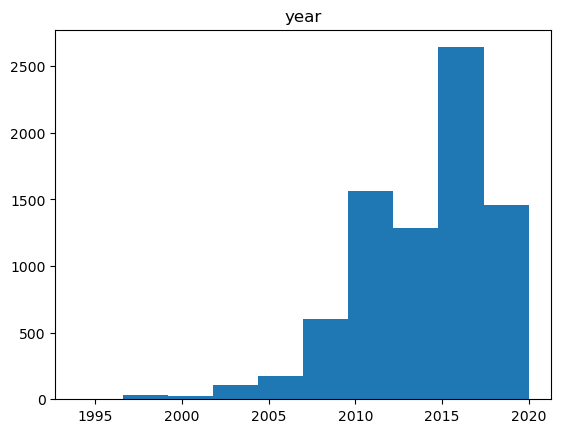

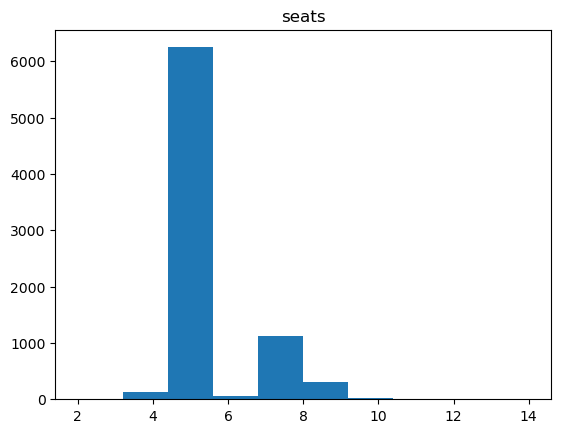

In [400]:
for column in numeric.columns:
    plt.hist(numeric[column])
    plt.title(column)
    plt.show()

In [401]:
# mileage
a=numeric['mileage'].mean()
print(a)
b=numeric['mileage'].std()
print(b)

19.421303
4.036935329437256


In [426]:
# Z score
# It returns standard deviation of each data points with respect to mean
# formula=(x-mean)/std
# If a value has a z score of more than +3 or less than -3 then it will be
# considered as an outlier

#Normal Distribution
# Km driven
def detect(column):
    mean=column.mean()
    std=column.std()
    z_score=(column-mean)/std
    return column[(z_score>3) | (z_score<-3)]
out=detect(numeric['km_driven'])
f=numeric['km_driven'].isin(out)
numeric=numeric[~f]
category=category[~f]

f=numeric['mileage'].isin(out)
numeric=numeric[~f]
category=category[~f]

f=numeric['max_power'].isin(out)
numeric=numeric[~f]
category=category[~f]

numeric=numeric.reset_index(drop=True)
category=category.reset_index(drop=True)

In [405]:
# Case2-->Unknown Distribution
# DBSCAN--> Density based spartial clustering of application with noise
# It converts the data points into cluster(groups)
# It also helps to detect the outliers
# DBSCAN-->1. Epsilon
           # 2.Min sample or min neighbour
# 1. Epsilon--> Epsilon is the radius around the data points
# 2. Min Sample-->Min neighbou or min samples are required to form a dense region

# There are three types of points in DBSCAN
# 1. Core Points->There should be atleast number of data points mentioned in the min neighbour
# 2.Border Points->In the circle/radius there are less points less than min neighbours
# 3.Noise Points->When no data points/ mi neighbour is present in the circle


In [430]:
data=numeric[['engine','selling_price']]
# Scaling
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
data=m.fit_transform(data)
data

array([[0.20939597, 0.04212648],
       [0.29328859, 0.0341024 ],
       [0.29295302, 0.01283861],
       ...,
       [0.20939597, 0.03530601],
       [0.2590604 , 0.02607833],
       [0.2590604 , 0.02607833]])

In [434]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.06,min_samples=10)
dbscan.fit(data)
labels=dbscan.labels_
print(np.unique(labels))
# -1 label means that it consist ofn all the noise points
print(np.unique(labels,return_counts=True))
# Samples whose circle contains similar number of points are labeled in one category

[-1  0  1  2  3  4  5]
(array([-1,  0,  1,  2,  3,  4,  5], dtype=int64), array([  15, 6190, 1500,   34,   10,   68,   12], dtype=int64))


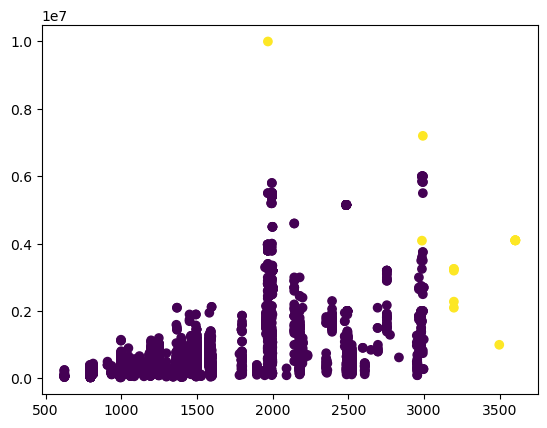

In [440]:
label=np.where(labels>-1,0,1)
plt.scatter(numeric['engine'],numeric['selling_price'],c=label)
plt.show()
numeric=numeric[labels==0]
category=category[labels==0]

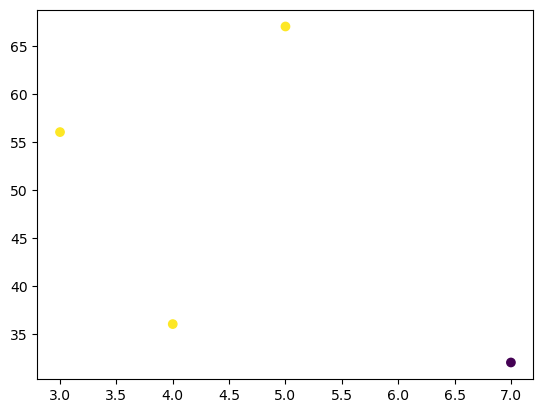

In [436]:
l=[3,4,5,7]
l1=[56,36,67,32]
# colur assign through numbers
colors=[1,1,1,0]
# It provide same colour to all 1 and another to 0
plt.scatter(l,l1,c=colors)
plt.show()


In [442]:
y=numeric['selling_price']
numeric=numeric.drop(columns=['selling_price'])
X=pd.concat((numeric,category),axis=1)
X

,max_power,engine,mileage,km_driven,year,seats,name,fuel,seller_type,transmission,owner
0,74.000000,1248.0,23.400000,145500,2014,5.0,1,1,0,0,0
1,103.519997,1498.0,21.139999,120000,2014,5.0,1,1,0,0,1
2,78.000000,1497.0,17.700001,140000,2006,5.0,1,0,0,0,2
3,90.000000,1396.0,23.000000,127000,2010,5.0,1,1,0,0,0
4,88.199997,1298.0,16.100000,120000,2007,5.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7824,82.849998,1197.0,18.500000,110000,2013,5.0,1,0,0,0,0
7825,110.000000,1493.0,16.799999,119000,2007,5.0,1,1,0,0,3
7826,73.900002,1248.0,19.299999,120000,2009,5.0,1,1,0,0,0
7827,70.000000,1396.0,23.570000,25000,2013,5.0,1,1,0,0,0


In [444]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('encode',OneHotEncoder(sparse=False),[1,2])],remainder='passthrough')
category=ct.fit_transform(X)
X

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,max_power,engine,mileage,km_driven,year,seats,name,fuel,seller_type,transmission,owner
0,74.000000,1248.0,23.400000,145500,2014,5.0,1,1,0,0,0
1,103.519997,1498.0,21.139999,120000,2014,5.0,1,1,0,0,1
2,78.000000,1497.0,17.700001,140000,2006,5.0,1,0,0,0,2
3,90.000000,1396.0,23.000000,127000,2010,5.0,1,1,0,0,0
4,88.199997,1298.0,16.100000,120000,2007,5.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7824,82.849998,1197.0,18.500000,110000,2013,5.0,1,0,0,0,0
7825,110.000000,1493.0,16.799999,119000,2007,5.0,1,1,0,0,3
7826,73.900002,1248.0,19.299999,120000,2009,5.0,1,1,0,0,0
7827,70.000000,1396.0,23.570000,25000,2013,5.0,1,1,0,0,0


In [446]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [452]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [454]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))


0.9068335105413148
